In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import json

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
print(Base.classes.keys())

['measurement', 'station']


In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
session = Session(engine)

In [6]:
today = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
today

('2017-08-23')

In [7]:
today = str(today)[2:-3]
today

'2017-08-23'

In [8]:
yearAgo = str(eval(today[:4])-1) + today[4:]
yearAgo

'2016-08-23'

In [9]:
year_precp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > yearAgo).all()


In [10]:
type(year_precp)

list

In [11]:
year_precipitation_table = pd.DataFrame(year_precp, columns = ["Date", "level of precipitation"])
year_precipitation_table.head()

,Date,level of precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


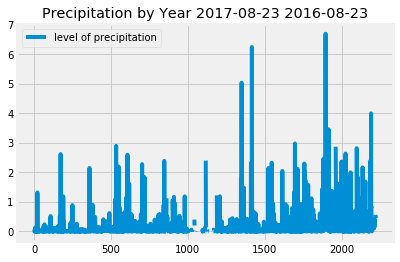

In [12]:
year_precipitation_table.plot(use_index=True)
plt.title("Precipitation by Year" + " " + today + " " + yearAgo)
plt.show()


In [13]:
year_precipitation_table.describe()


,level of precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
station_list = session.query(Station.station)
station_list.count()

9

In [15]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

In [16]:
for row in most_active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
top_station = most_active_stations[0][0]

In [18]:
hottest_station_list = session.query(Measurement.tobs).group_by(Measurement.tobs).filter(Measurement.station==top_station).filter(Measurement.date > yearAgo).order_by(Measurement.tobs.desc()).all()

In [19]:
type(hottest_station_list)

list

In [20]:
most_active_tobs_table = pd.DataFrame(hottest_station_list, columns = ["temperature"])
most_active_tobs_table.head()

,temperature
0,83.0
1,82.0
2,81.0
3,80.0
4,79.0


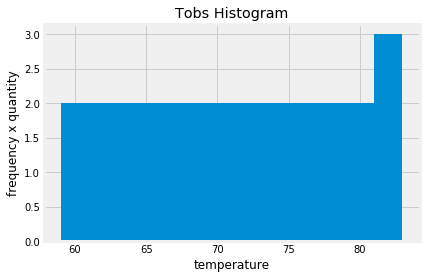

In [21]:
tobs_histogram = most_active_tobs_table.hist(bins=12)
plt.title("Tobs Histogram")
plt.xlabel("temperature")
plt.ylabel("frequency x quantity")
plt.show()

In [ ]:
from werkzeug.wrappers import Request, Response
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

@app.route("/api/v1.0/precipitation")
def precipitation():
    previous_tobs_dates=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > yearAgo).all()
    d = {}
    for item in previous_tobs_dates:
        d[item[0]]=item[1]
    print(d)
    return json.dumps(d)

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Sep/2018 21:26:39] "GET /api/v1.0/precipitation HTTP/1.1" 200 -


{'2016-08-24': 74.0, '2016-08-25': 77.0, '2016-08-26': 80.0, '2016-08-27': 74.0, '2016-08-28': 71.0, '2016-08-29': 78.0, '2016-08-30': 75.0, '2016-08-31': 76.0, '2016-09-01': 77.0, '2016-09-02': 75.0, '2016-09-03': 75.0, '2016-09-04': 73.0, '2016-09-05': 76.0, '2016-09-06': 73.0, '2016-09-07': 74.0, '2016-09-08': 74.0, '2016-09-09': 75.0, '2016-09-10': 75.0, '2016-09-11': 71.0, '2016-09-12': 72.0, '2016-09-13': 75.0, '2016-09-14': 73.0, '2016-09-15': 73.0, '2016-09-16': 73.0, '2016-09-17': 76.0, '2016-09-18': 75.0, '2016-09-19': 70.0, '2016-09-20': 70.0, '2016-09-21': 73.0, '2016-09-22': 73.0, '2016-09-23': 73.0, '2016-09-24': 77.0, '2016-09-25': 76.0, '2016-09-26': 74.0, '2016-09-27': 74.0, '2016-09-28': 77.0, '2016-09-29': 77.0, '2016-09-30': 73.0, '2016-10-01': 74.0, '2016-10-02': 73.0, '2016-10-03': 76.0, '2016-10-04': 74.0, '2016-10-05': 75.0, '2016-10-06': 75.0, '2016-10-07': 73.0, '2016-10-08': 74.0, '2016-10-09': 77.0, '2016-10-10': 74.0, '2016-10-11': 74.0, '2016-10-12': 78.0,